[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pytosha/new-python-repo/blob/main/Lesson3/notebooks/Task2_dmrf_visual.ipynb)

# Задание
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф" | Если не получается скачать данные, реализуйте загрузку данных из pickle-файла
* Cохранить ее в pandas dataframe, а также в excel, pickle, БД

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

*  Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.



In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import requests
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [2]:
#Загрузка DataFrame из файла .pkl
df = pd.read_pickle("C:\Users\79525\Desktop\Sber_DS\01_Python_Levchenko\df_pickle.pkl")

In [3]:
df.head (10)

,errcode,data.id,data.hobjId,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,...,data.metro.colors,data.transportDistIndex,data.transportDistIndexValue,data.complexShortNm,data.airQualityIndexValue,data.greenAreaIndexValue,data.developer.bankruptStage.bankruptStageCd,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm
0,0,13399,34754,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13391,37219,28101,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13383,39024,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13398,37165,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13397,37201,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,10891,6541,23054,3006,ААК ВОЛОГДААГРОСТРОЙ,ААК ВОЛОГДААГРОСТРОЙ,АКЦИОНЕРНАЯ АГРОСТРОИТЕЛЬНАЯ КОМПАНИЯВОЛОГДААГ...,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,56006,136720,795065,3980,АВАЛОН,АВАЛОН,АВАЛОН,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,30292,115751,120396,7699,АВАЛОН СИТИ,АВАЛОН СИТИ,АВАЛОН СИТИ,0,1,...,[#CD0505],6 / 10,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,18709,26010,44330,3812,АВИГРАН,АВИГРАН,АВИГРАН,0,2,...,NaN,NaN,NaN,ЖК Новое Лыткарино,6.0,NaN,NaN,NaN,NaN,NaN
0,0,18708,36235,44330,3812,АВИГРАН,АВИГРАН,АВИГРАН,0,2,...,NaN,NaN,NaN,ЖК Новое Лыткарино,6.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Выводим названия всех столбцов
list (df.columns)

['errcode',
 'data.id',
 'data.hobjId',
 'data.pdId',
 'data.developer.devId',
 'data.developer.devShortCleanNm',
 'data.developer.devShortNm',
 'data.developer.devFullCleanNm',
 'data.developer.problObjCnt',
 'data.developer.buildObjCnt',
 'data.developer.comissObjCnt',
 'data.developer.regRegionDesc',
 'data.developer.devPhoneNum',
 'data.developer.devSite',
 'data.developer.devEmail',
 'data.developer.devInn',
 'data.developer.devOgrn',
 'data.developer.devKpp',
 'data.developer.devLegalAddr',
 'data.developer.devFactAddr',
 'data.developer.lastRpdId',
 'data.developer.fundGuarantyFlg',
 'data.developer.devOrgRegRegionCd',
 'data.developer.devEmplMainFullNm',
 'data.developer.developerGroupName',
 'data.developer.orgForm.id',
 'data.developer.orgForm.fullForm',
 'data.developer.orgForm.shortForm',
 'data.developer.companyGroupId',
 'data.developer.objGuarantyEscrowFlg',
 'data.developer.govFundFlg',
 'data.region',
 'data.address',
 'data.floorMin',
 'data.floorMax',
 'data.objElemL

In [5]:
# Соберем нужные нам столбцы
data_col= []
data_col.extend(['data.id', 'data.region', 'data.developer.regRegionDesc' ,'data.address', 'data.nameObj'])
data_col.extend(['data.objSquareLiving', 'data.objReady100PercDt', 'data.objElemParkingCnt'])
data_col.extend(['data.objLkClassDesc', 'data.objFlatCnt', 'data.objFloorCnt', 'data.infrastructureIndexValue', 'data.objInfrstrObjPrkngCnt'])
data_col.extend(['data.floorMin', 'data.floorMax', 'data.metro.isWalk', 'data.metro.time'])
data_col.extend(['data.objPriceAvg', 'data.soldOutPerc', 'data.transportDistIndexValue'])
df_slice = df[data_col]
df_slice.head()

,data.id,data.region,data.developer.regRegionDesc,data.address,data.nameObj,data.objSquareLiving,data.objReady100PercDt,data.objElemParkingCnt,data.objLkClassDesc,data.objFlatCnt,data.objFloorCnt,data.infrastructureIndexValue,data.objInfrstrObjPrkngCnt,data.floorMin,data.floorMax,data.metro.isWalk,data.metro.time,data.objPriceAvg,data.soldOutPerc,data.transportDistIndexValue
0,13399,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",NaN,0.00,2024-12-31,125,Элитный,0,1,10,0.0,1,1,NaN,NaN,50768.0,0.917243,NaN
0,13391,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",NaN,4343.90,2023-12-31,41,Элитный,44,12,10,0.0,3,12,NaN,NaN,62638.0,0.520845,NaN
0,13383,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",NaN,6423.85,2023-12-31,36,Элитный,68,20,10,0.0,4,20,NaN,NaN,67159.0,0.572803,NaN
0,13398,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",NaN,4812.98,2024-12-31,0,Элитный,43,10,10,4.0,7,10,NaN,NaN,47886.0,1.000000,NaN
0,13397,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",NaN,6251.10,2024-12-31,0,Элитный,65,12,10,11.0,6,12,NaN,NaN,47163.0,0.999984,NaN


In [6]:
#скачаем названия регионов и добавим в df

url_region = 'https://github.com/hflabs/region/raw/master/region.csv'
res = requests.get(url_region)
data_region = res.text
with open('region.csv', 'w+', encoding='utf-8') as file:
    file.write(data_region)

In [7]:
df_r = pd.read_csv("C:\Users\79525\Desktop\Sber_DS\01_Python_Levchenko\region.csv")

In [8]:
df_r.head(10)

,name,type,name_with_type,federal_district,kladr_id,fias_id,okato,oktmo,tax_office,postal_code,iso_code,timezone,geoname_code,geoname_id,geoname_name
0,Адыгея,Респ,Респ Адыгея,Южный,100000000000,d8327a56-80de-4df2-815c-4f6ab1224c50,79000000000,79000000,100,385000.0,RU-AD,UTC+3,RU.01,584222,Adygeya Republic
1,Башкортостан,Респ,Респ Башкортостан,Приволжский,200000000000,6f2cbfd8-692a-4ee4-9b16-067210bde3fc,80000000000,80000000,200,452000.0,RU-BA,UTC+5,RU.08,578853,Bashkortostan Republic
2,Бурятия,Респ,Респ Бурятия,Дальневосточный,300000000000,a84ebed3-153d-4ba9-8532-8bdf879e1f5a,81000000000,81000000,300,671000.0,RU-BU,UTC+8,RU.11,2050915,Buryatiya Republic
3,Алтай,Респ,Респ Алтай,Сибирский,400000000000,5c48611f-5de6-4771-9695-7e36a4e7529d,84000000000,84000000,400,649000.0,RU-AL,UTC+7,RU.03,1506272,Altai
4,Дагестан,Респ,Респ Дагестан,Северо-Кавказский,500000000000,0bb7fa19-736d-49cf-ad0e-9774c4dae09b,82000000000,82000000,500,368000.0,RU-DA,UTC+3,RU.17,567293,Dagestan
5,Ингушетия,Респ,Респ Ингушетия,Северо-Кавказский,600000000000,b2d8cd20-cabc-4deb-afad-f3c4b4d55821,26000000000,26000000,600,386000.0,RU-IN,UTC+3,RU.19,556349,Ingushetiya Republic
6,Кабардино-Балкарская,Респ,Кабардино-Балкарская Респ,Северо-Кавказский,700000000000,1781f74e-be4a-4697-9c6b-493057c94818,83000000000,83000000,700,NaN,RU-KB,UTC+3,RU.22,554667,Kabardino-Balkariya Republic
7,Калмыкия,Респ,Респ Калмыкия,Южный,800000000000,491cde9d-9d76-4591-ab46-ea93c079e686,85000000000,85000000,800,NaN,RU-KL,UTC+3,RU.24,553972,Kalmykiya Republic
8,Карачаево-Черкесская,Респ,Карачаево-Черкесская Респ,Северо-Кавказский,900000000000,61b95807-388a-4cb1-9bee-889f7cf811c8,91000000000,91000000,900,NaN,RU-KC,UTC+3,RU.27,552927,Karachayevo-Cherkesiya Republic
9,Карелия,Респ,Респ Карелия,Северо-Западный,1000000000000,248d8071-06e1-425e-a1cf-d1ff4c4a14a8,86000000000,86000000,1000,NaN,RU-KR,UTC+3,RU.28,552548,Karelia


In [9]:
# Добавление название региона в DataFrame
df_region = pd.read_csv('region.csv', sep=',')[['name_with_type', 'kladr_id']]
df_region['kladr_id'] = (df_region['kladr_id']/100000000000).astype('int64')
df_region.set_index('kladr_id', inplace=True)
df = pd.merge(df_slice, df_region, left_on='data.region', right_on=df_region.index)
df.rename(columns={'name_with_type':'name_region'}, inplace=True)
df['data.region'] = df['data.region'].astype('str')
df.sample(3)

,data.id,data.region,data.developer.regRegionDesc,data.address,data.nameObj,data.objSquareLiving,data.objReady100PercDt,data.objElemParkingCnt,data.objLkClassDesc,data.objFlatCnt,...,data.infrastructureIndexValue,data.objInfrstrObjPrkngCnt,data.floorMin,data.floorMax,data.metro.isWalk,data.metro.time,data.objPriceAvg,data.soldOutPerc,data.transportDistIndexValue,name_region
7678,49198,29,Архангельская область,"г Архангельск, пр-кт Новгородский, д. 103","ЖК ""Новый город""",4753.95,2025-12-31,14,Комфорт,94,...,10,7.0,9,9,NaN,NaN,133397.0,0.729126,NaN,Архангельская обл
3600,49714,23,Краснодарский край,"п Пригородный, улица Софийская, д. 1","ЖК ""Фруктовый сад""",1666.74,2025-12-31,0,Комфорт,48,...,2,95.0,3,3,NaN,NaN,107000.0,0.011675,NaN,Краснодарский край
7566,53269,62,Татарстан Республика,"г Рязань, район Советский р-н, п Солотча, д. 10","ЖК ""Солотчинский квартал""",5609.72,2025-03-31,0,Бизнес,98,...,1,61.0,6,6,NaN,NaN,144687.0,0.031996,NaN,Рязанская обл


In [10]:
# Сохраняем в csv
df.to_csv("df_csv.csv")

In [11]:
# оставим только обьекты с известной ценой квадратного метра
df_price = df[df['data.objPriceAvg'].notnull()]
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8088 entries, 0 to 11704
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data.id                        8088 non-null   int64  
 1   data.region                    8088 non-null   object 
 2   data.developer.regRegionDesc   8018 non-null   object 
 3   data.address                   8088 non-null   object 
 4   data.nameObj                   6465 non-null   object 
 5   data.objSquareLiving           8088 non-null   float64
 6   data.objReady100PercDt         8088 non-null   object 
 7   data.objElemParkingCnt         8088 non-null   int64  
 8   data.objLkClassDesc            8088 non-null   object 
 9   data.objFlatCnt                8088 non-null   int64  
 10  data.objFloorCnt               8088 non-null   int64  
 11  data.infrastructureIndexValue  8088 non-null   int64  
 12  data.objInfrstrObjPrkngCnt     8081 non-null   

# 1. Cредняя цена за кв.м по регионам

In [12]:
# Табличные данные
reg_avg = df_price[['name_region', 'data.objPriceAvg']].groupby('name_region').mean()
reg_avg

,data.objPriceAvg
name_region,
Алтайский край,87372.357143
Амурская обл,145182.166667
Архангельская обл,103082.739130
Астраханская обл,100834.300000
Белгородская обл,92121.162791
...,...
Ямало-Ненецкий АО,144591.076923
Ярославская обл,82661.880435
г Москва,380967.867089


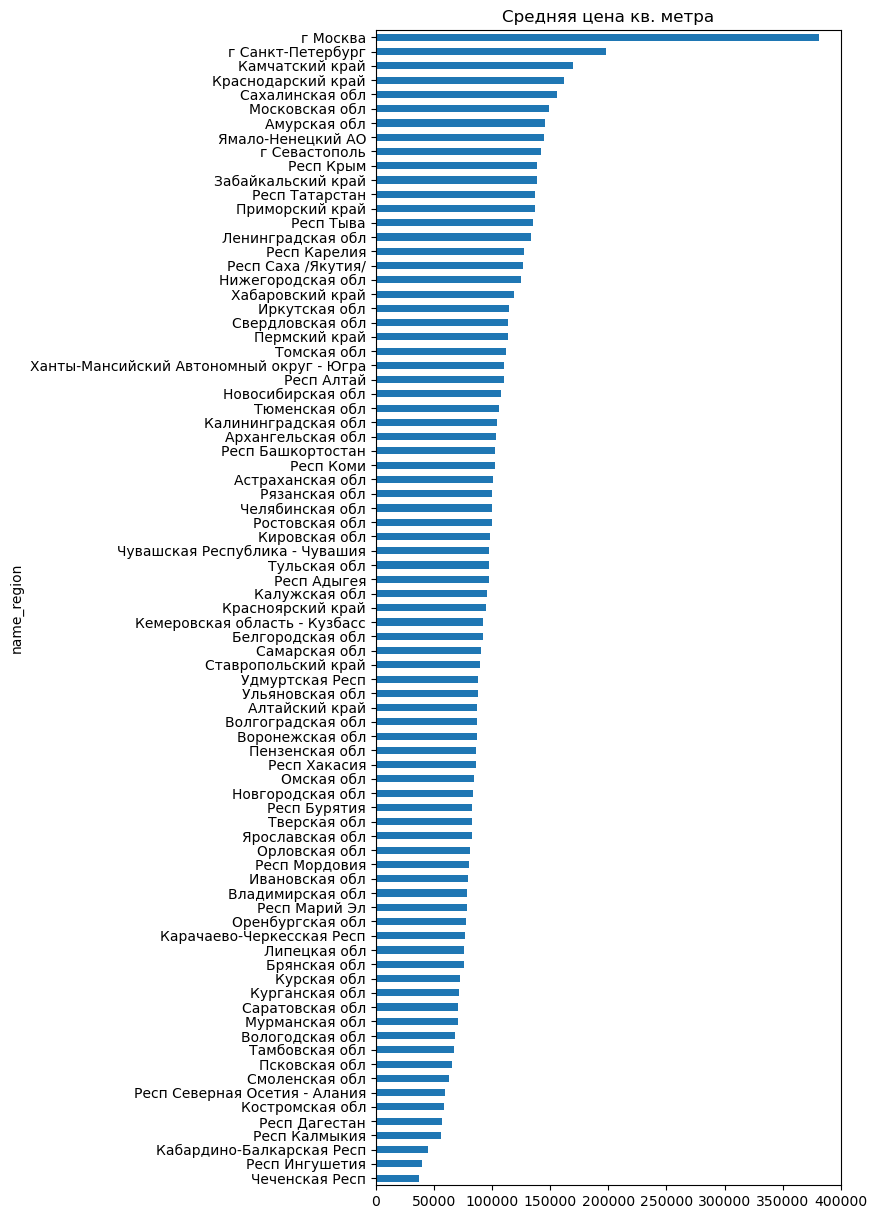

In [13]:
# Визуализация средней цены за кв. м по регионам
reg_avg.sort_values(by='data.objPriceAvg').plot(figsize=(6, 15), kind='barh', legend=False,
                                         xlabel='', title='Средняя цена кв. метра')
plt.show()

Вывод: 
1. ТОП-3 региона по средней цене за кв.м.:
    г.Москва
    г.Санкт-Петербург
    Камчатский край
2. ВОТТОМ:
    Кабардино-Балкарская республика
    Республика Ингушетия
    Чеченская песпублика

# 2. Средняя цена за кв.м по классу жилья

In [14]:
# Табличные данные
df_class_price = df[['name_region',
                           'data.objLkClassDesc',
                           'data.objPriceAvg']].groupby(['name_region', 
                                                    'data.objLkClassDesc']).mean().unstack()
df_class_price.columns = df_class_price.columns.get_level_values(1)
df_class_price.columns.name = None
df_class_price.sample(5)

,Бизнес,Другое,Комфорт,Типовой,Элитный
name_region,,,,,
Пермский край,133818.777778,NaN,112699.537500,97417.384615,186443.5
Курганская обл,NaN,NaN,69118.346154,75422.000000,NaN
Псковская обл,48330.000000,NaN,74211.428571,64034.500000,NaN
Ивановская обл,54888.500000,NaN,82729.360000,71372.666667,NaN
Респ Бурятия,NaN,NaN,84113.575758,79307.333333,109386.0


# 3. Объемы вводимого жилья по регионам и по годам.

In [15]:
# Объем введенного жилья по регионам по годам
build_speed = df[['name_region', 'data.objSquareLiving']]
build_speed['year'] = pd.to_datetime(df['data.objReady100PercDt'], yearfirst=True).dt.year
df_filter = (build_speed['year'] > 2021) & (build_speed['year'] < 2030)
build_speed = build_speed[df_filter].groupby(['name_region', 'year']).sum().reset_index()

/tmp/ipykernel_5370/1983992015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build_speed['year'] = pd.to_datetime(df['data.objReady100PercDt'], yearfirst=True).dt.year


In [16]:
# Функции для интерактивности
def sns_plot(df, region1, region2):
    sns.relplot(
        x='year',
        y='data.objSquareLiving',
        hue='name_region',
        data=df[df['name_region'].isin([region1, region2])],
        kind='line',
        aspect=2
    )
    plt.title('Количество вводимого жилья по годам', size=20)
    plt.show()
    
    
def f2(region1, region2):
    sns_plot(build_speed, region1, region2)

In [17]:
# Интерактивное сравнение городов
interact(f2, region1=list(build_speed.name_region.unique()), region2=list(build_speed.name_region.unique()));

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


# 4. Распределение средней этажности домов по регионам

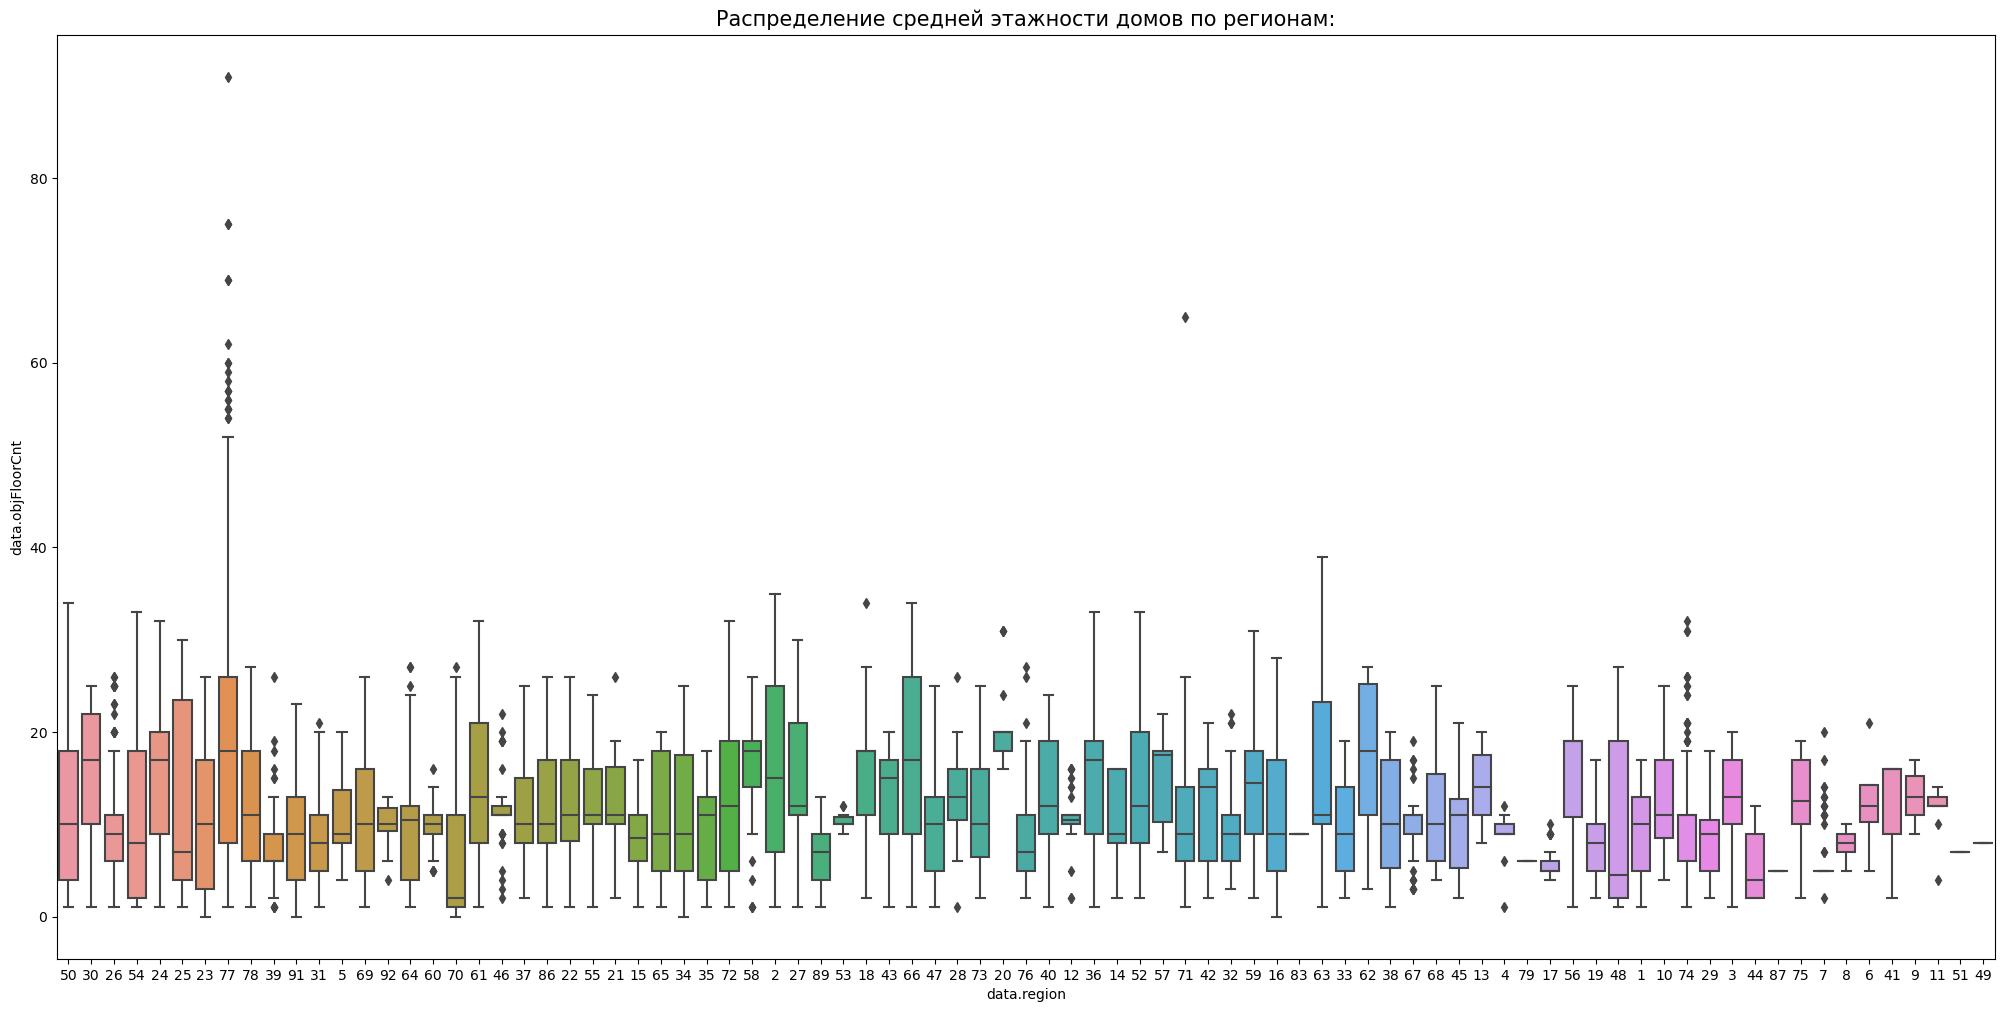

In [18]:
plt.figure(figsize=(25,12))
sns.boxplot(data=df.sort_values('data.objReady100PercDt'),
            x='data.region',
            y='data.objFloorCnt')
plt.title('Распределение средней этажности домов по регионам:', size=15);

# 5. Распределение кол-ва парковочных мест у новостроек по регионам

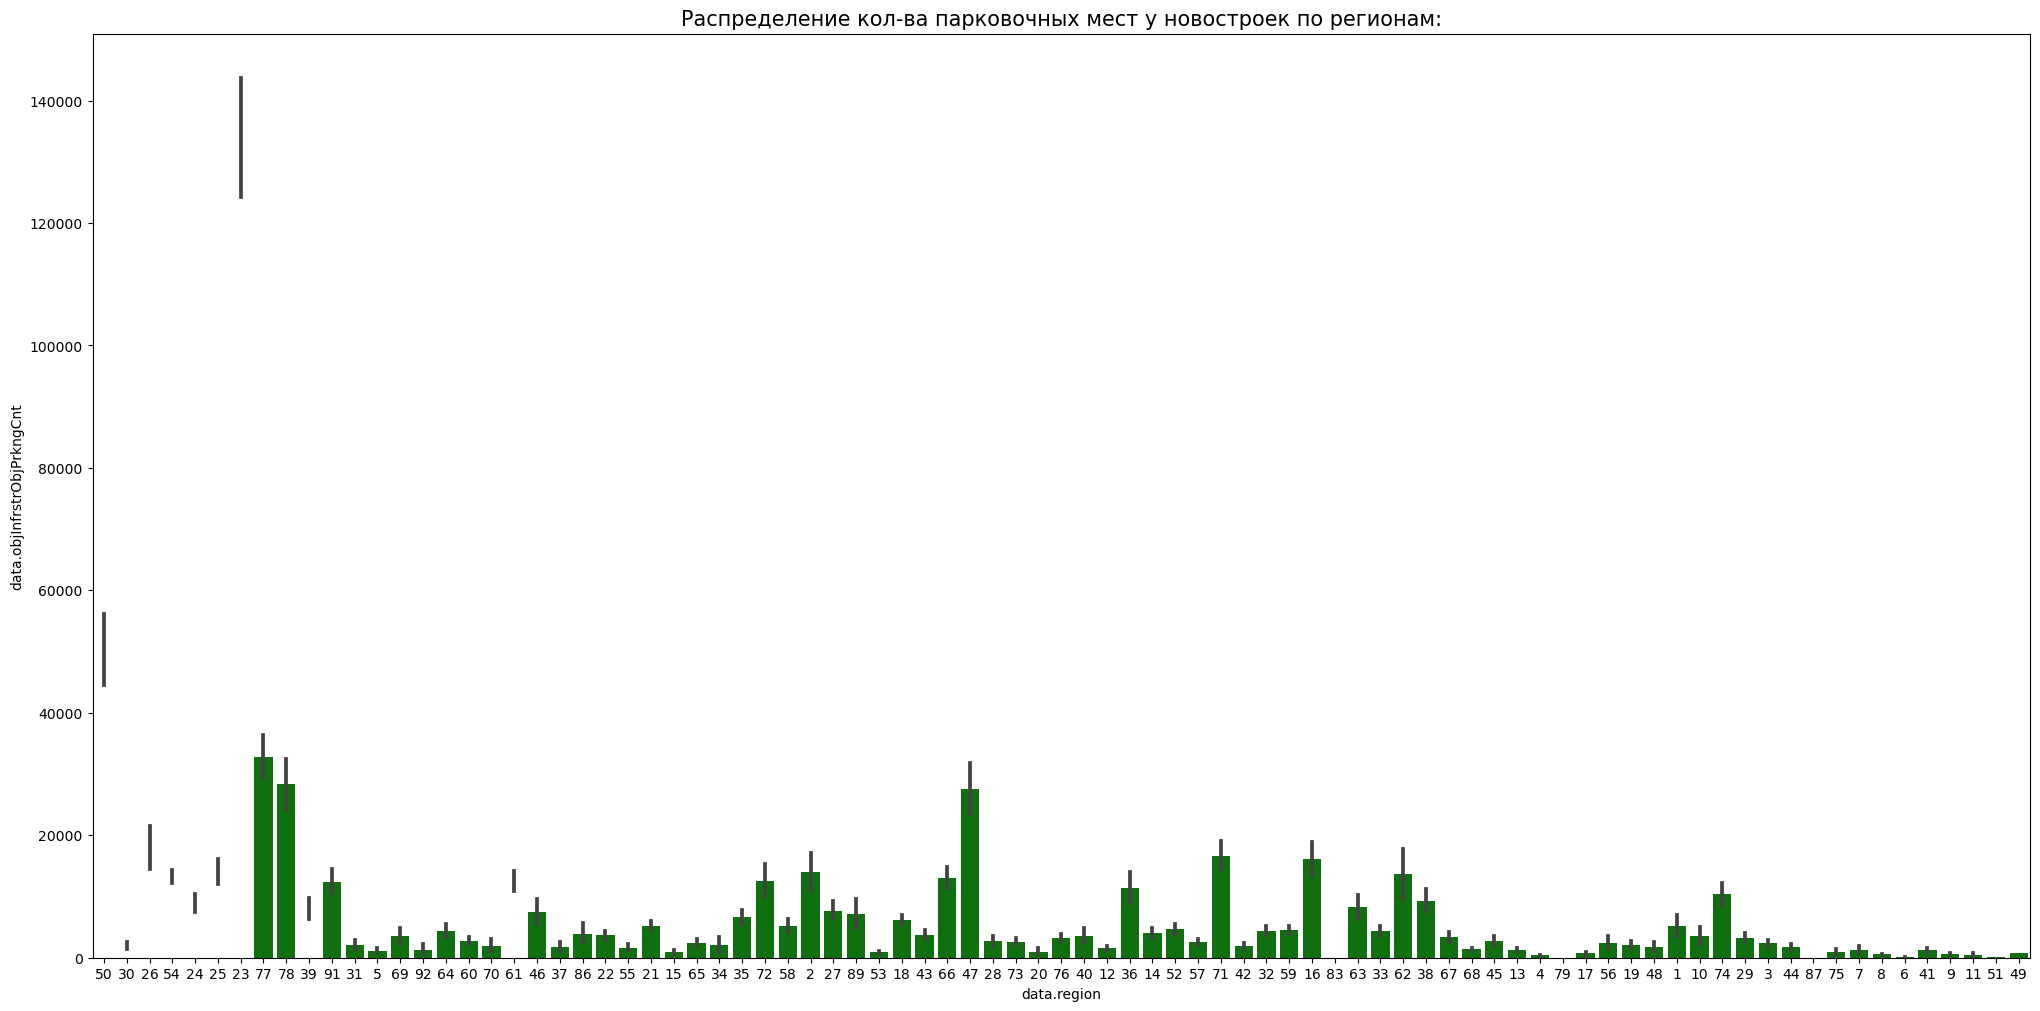

In [19]:
plt.figure(figsize=(25,12))
sns.barplot(data=df.sort_values('data.objReady100PercDt'),
            x='data.region',
            y='data.objInfrstrObjPrkngCnt',
            estimator=sum,
           color='g')
plt.title('Распределение кол-ва парковочных мест у новостроек по регионам:', size=15);

In [20]:
class Extractor:
    def __init__(self):
        self.data = None
        
    def get_data(self):
        return self.data
        
    def extract_csv(self):
        self.data = pd.read_csv("/home/ivanov-di/DS/01_Python/HW_2/df_csv.csv")
        return self.data

In [21]:
extr = Extractor()
data = extr.extract_csv()

In [33]:
class Visualizer:
    def __init__(self, data):
        self.data = data
        self.regions = {}
    
   
    def barh_compare_price(self, region1, region2):
            df = self.data[['name_region',
                               'data.objLkClassDesc',
                               'data.objPriceAvg']].groupby(['name_region', 
                                                        'data.objLkClassDesc']).mean().unstack()
            df.columns = df.columns.get_level_values(1)
            df.columns.name = None
            fig, axes = plt.subplots(figsize=(15, 6), nrows=1, ncols=2, sharex=True)
            sub_df1 = df.loc[region1, :]
            sub_df2 = df.loc[region2, :]
            sub_df1.plot(ax=axes[0], kind='barh', xlabel='', ylabel='', 
                         title=f'Средняя цена кв. метра {region1}')
            sub_df2.plot(ax=axes[1], kind='barh', xlabel='', ylabel='', 
                         title=f'Средняя цена кв. метра {region2}')
            plt.show()
       
    def plot_build_speed(self, region1, region2):
            build_speed = self.data[['name_region', 'data.id']]
            build_speed['year'] = pd.to_datetime(self.data['data.objReady100PercDt'], 
                                                 yearfirst=True).dt.year
            df_filter = (build_speed['year'] > 2021) & (build_speed['year'] < 2030)
            build_speed = build_speed[df_filter].groupby(['name_region', 
                                                          'year']).count().reset_index()
            sns.relplot(
                x='year',
                y='data.id',
                hue='name_region',
                data=build_speed[build_speed['name_region'].isin([region1, region2])],
                kind='line',
                aspect=2
            )
            plt.title('Количество вводимого жилья по годам', size=20)
            plt.show()
        
    def sq_meter_price_hist(self):
            means = self.data[['name_region', 'data.objPriceAvg']].groupby('name_region').mean()
            means.sort_values(by='data.objPriceAvg').plot(figsize=(6, 15), kind='barh', 
                                                     legend=False, xlabel='', 
                                                     title='Средняя цена кв. метра')
            plt.show()

In [34]:
visual = Visualizer(extr.extract_csv())

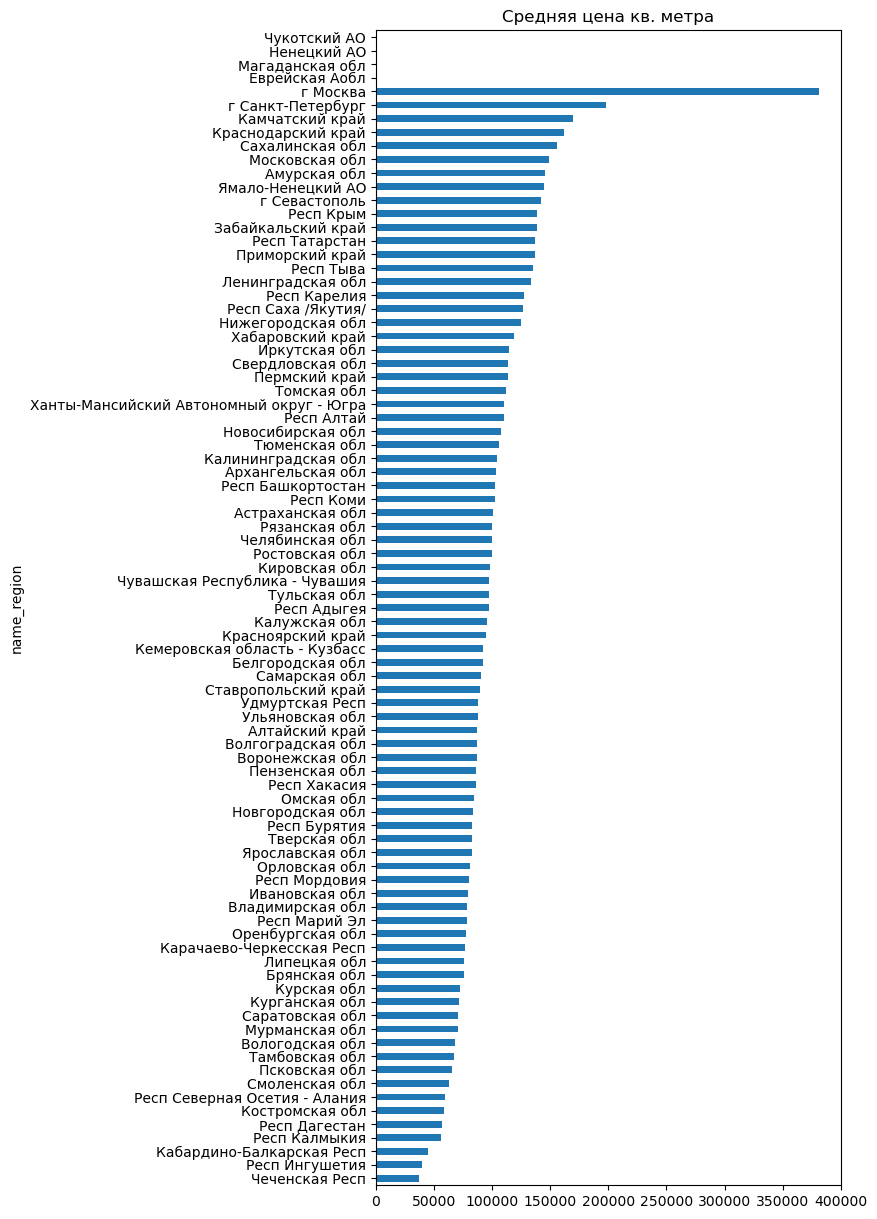

In [35]:
visual.sq_meter_price_hist()

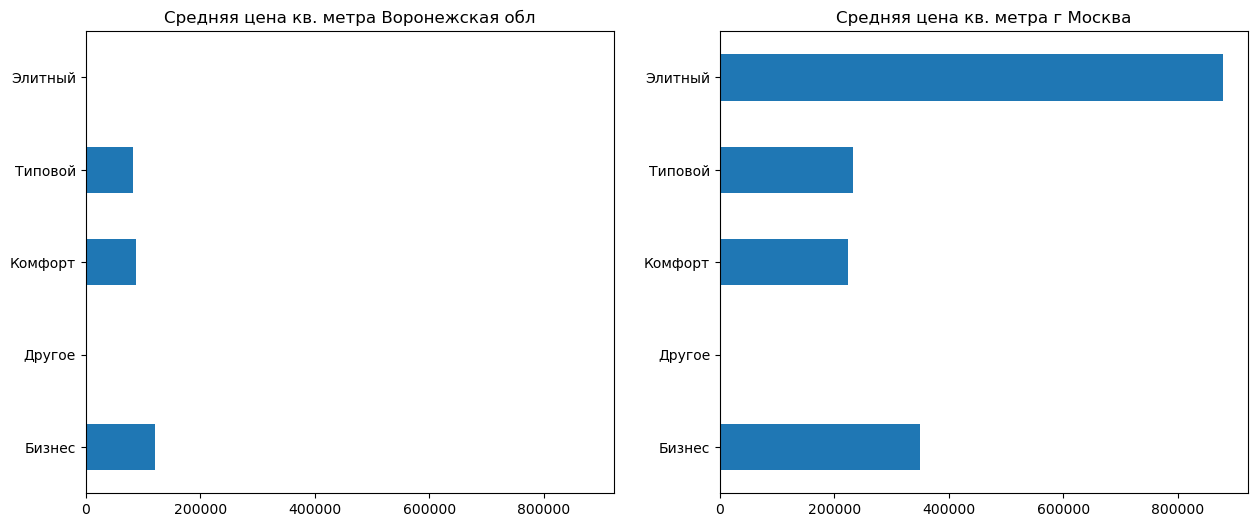

In [26]:
visual.barh_compare_price('Воронежская обл', 'г Москва')

/tmp/ipykernel_5370/261631587.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build_speed['year'] = pd.to_datetime(self.data['data.objReady100PercDt'],


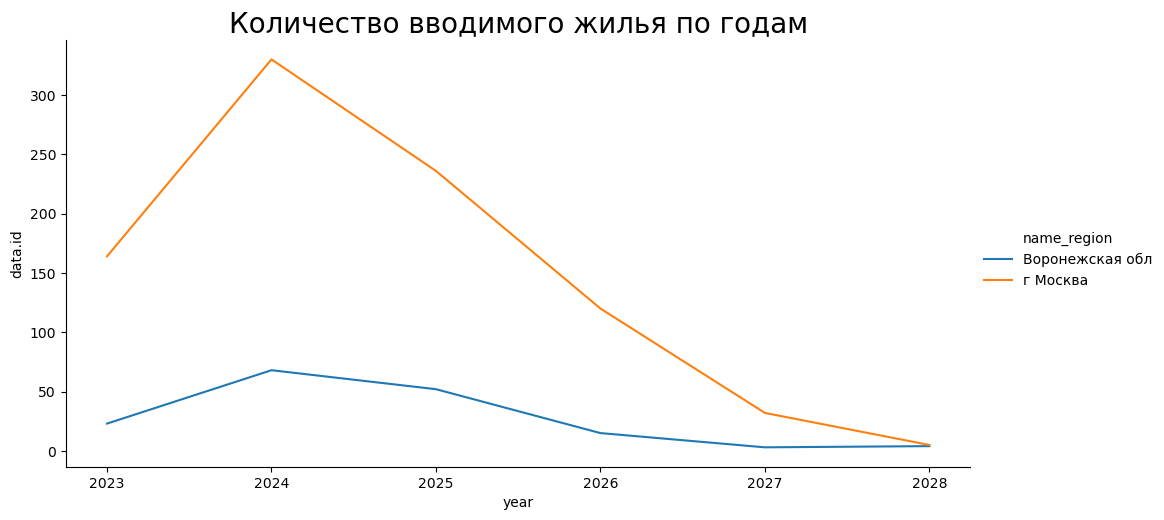

In [27]:
visual.plot_build_speed('г Москва', 'Воронежская обл')